<a href="https://colab.research.google.com/github/RafaelVieira13/Diabetes_Classification/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import *
from sklearn.preprocessing import StandardScaler

# Getting The Data Fro Kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafaelvieira123","key":"e9c934bc1cf73532a81f9a4e6ae3696f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json

chmod: cannot access '/root/.kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

100% 734k/734k [00:00<00:00, 1.54MB/s]
100% 734k/734k [00:00<00:00, 1.54MB/s]


In [ ]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
df =pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Prep the Data

In [ ]:
# Missing Values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Numeric Columns
df.describe(include=np.number)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


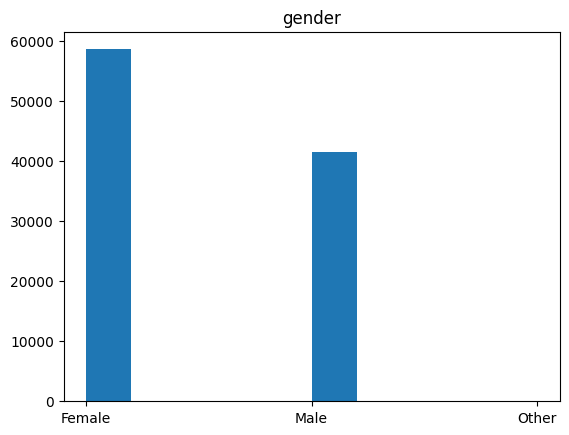

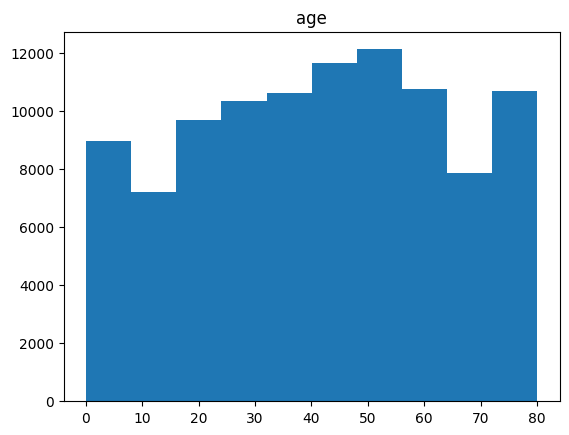

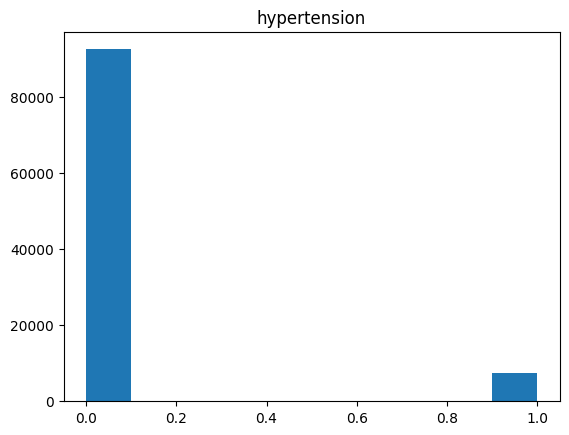

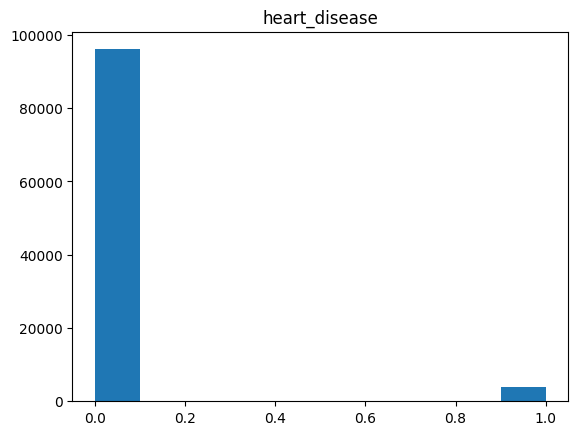

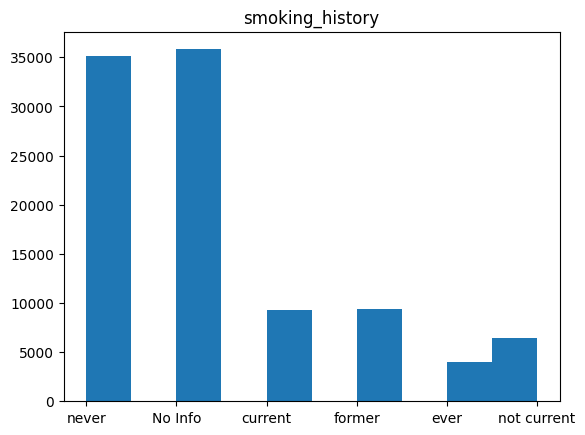

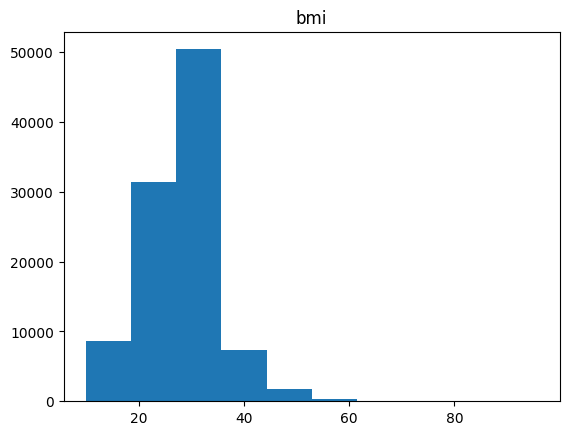

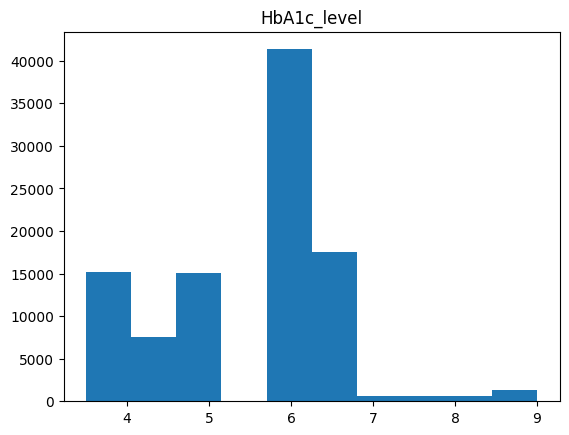

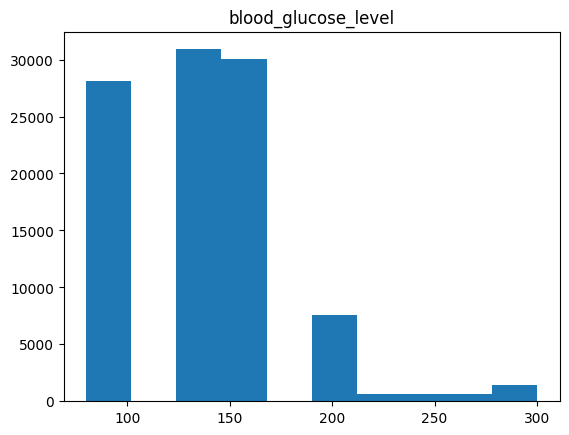

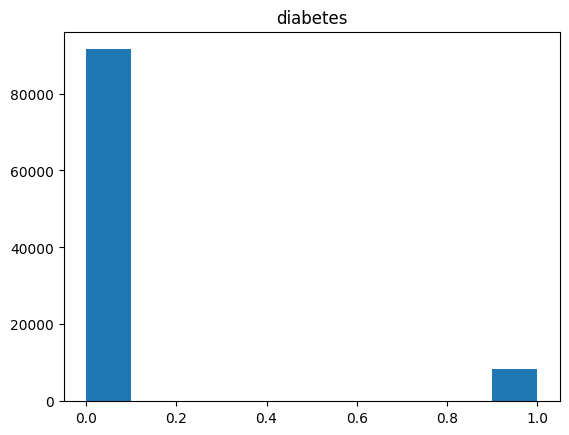

In [ ]:
columns = df.columns
for i in columns:
  plt.figure()
  plt.hist(df[i])
  plt.title(i)

In [ ]:
df["Logbmi"] = np.log(df["bmi"]+1)
df['Logblood_glucose_level'] = np.log(df['blood_glucose_level']+1)

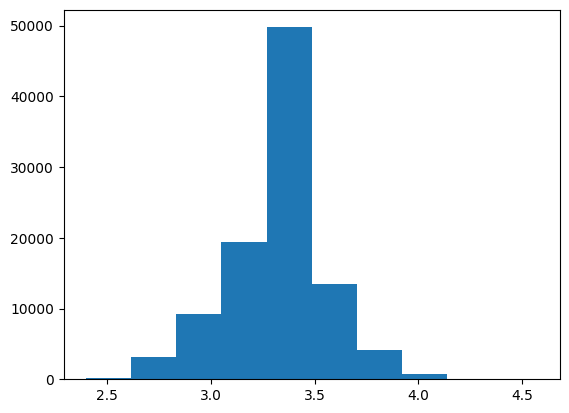

In [ ]:
plt.hist(df['Logbmi'])
plt.show()

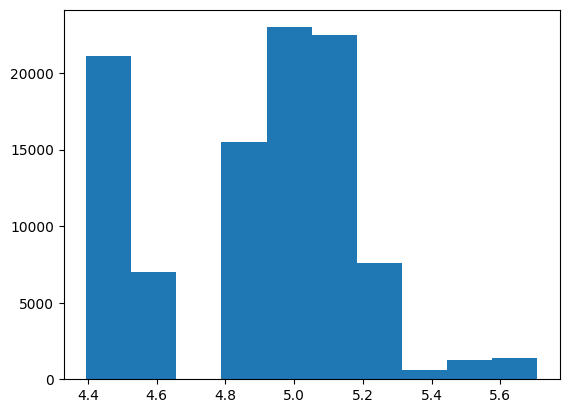

In [ ]:
plt.hist(df['Logblood_glucose_level'])
plt.show()

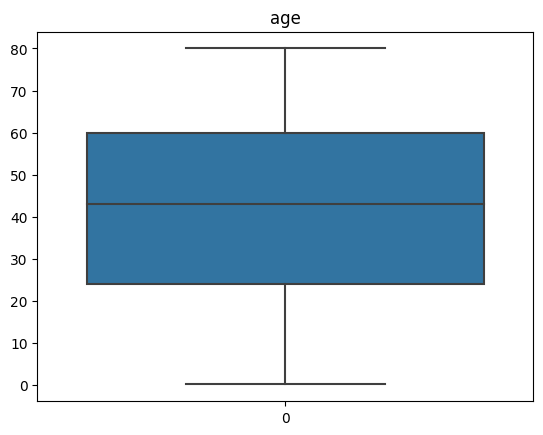

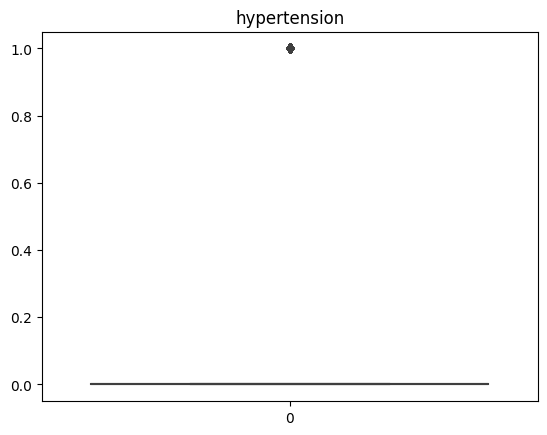

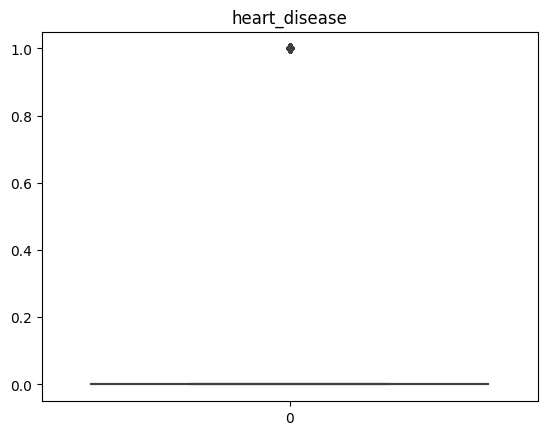

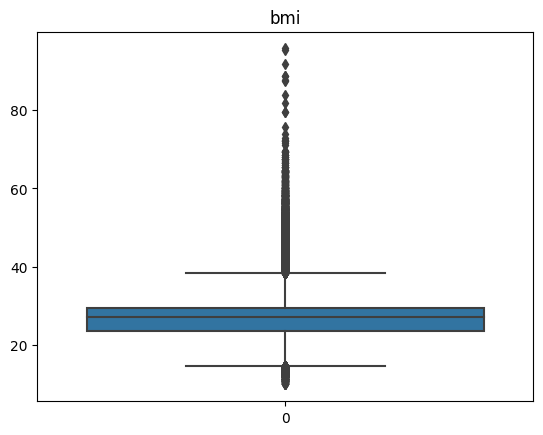

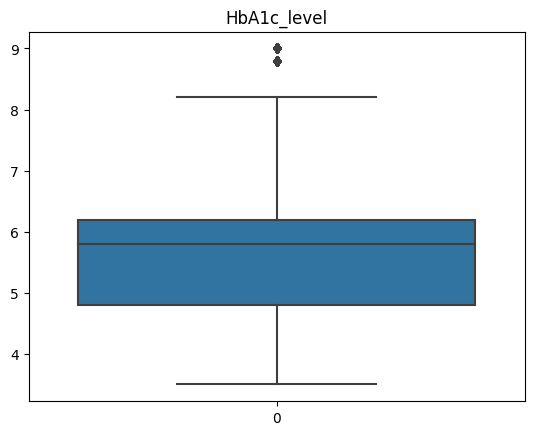

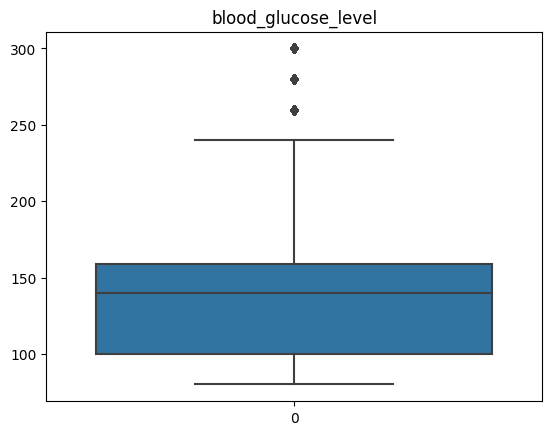

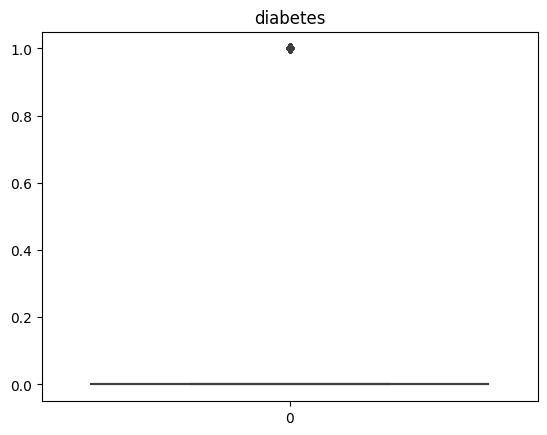

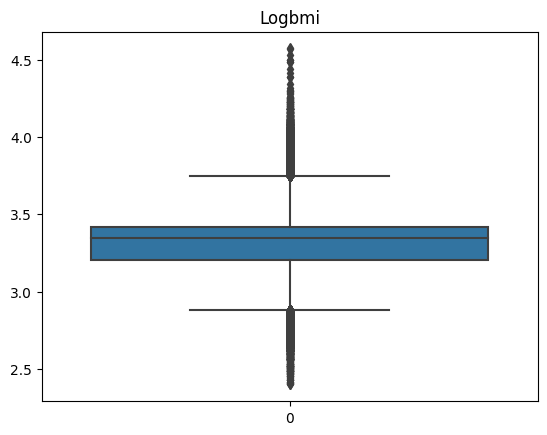

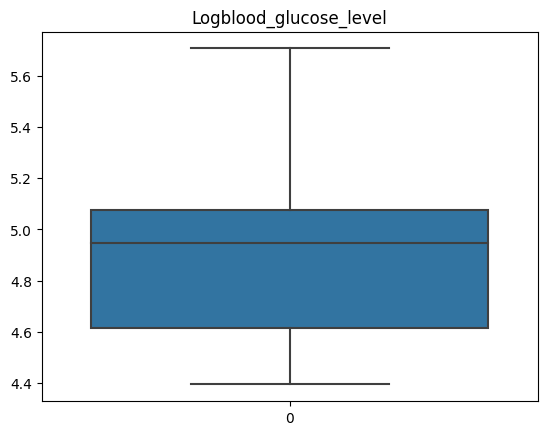

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

In [ ]:
# Categorical data
df.describe(include=[object])

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [ ]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
# get dummies variables
df = pd.get_dummies(df, columns=['gender','smoking_history'])
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Logbmi', 'Logblood_glucose_level',
       'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [ ]:
added_cols = ['gender_Female', 'gender_Male','gender_Other','smoking_history_No Info','smoking_history_current','smoking_history_ever','smoking_history_former','smoking_history_never','smoking_history_not current']
df[added_cols].head()


,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0


In [ ]:
sorted(df['heart_disease'].unique())

[0, 1]

In [ ]:
sorted(df['hypertension'].unique())

[0, 1]

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Logbmi,Logblood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,3.265378,4.948760,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,3.343568,4.394449,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,3.343568,5.068904,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,3.196630,5.049856,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,3.051167,5.049856,0,1,0,0,1,0,0,0,0


In [ ]:
# Let´s define the y variabel
t_dep = tensor(df['diabetes'])

In [ ]:
# Let´s define the x variabels
indep_cols = ['age','hypertension','heart_disease','HbA1c_level','Logbmi','Logblood_glucose_level'] + added_cols

In [ ]:
# Feature Scalling --- Standardization
scaler = StandardScaler()
scaler.fit(df[indep_cols])
scaled = scaler.fit_transform(df[indep_cols])
scaled_df = pd.DataFrame(scaled, columns = df[indep_cols].columns)
scaled_df.head()

,age,hypertension,heart_disease,HbA1c_level,Logbmi,Logblood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,-0.284439,4.936379,1.001706,-0.225363,0.191776,0.841358,-0.841046,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
1,0.538006,-0.284439,-0.202578,1.001706,0.114538,-1.708135,0.841358,-0.841046,-0.013418,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
2,-0.616691,-0.284439,-0.202578,0.161108,0.114538,0.603573,-1.188554,1.188995,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
3,-0.261399,-0.284439,-0.202578,-0.492690,-0.524214,0.538285,0.841358,-0.841046,-0.013418,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512
4,1.515058,3.515687,4.936379,-0.679490,-1.156556,0.538285,-1.188554,1.188995,-0.013418,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512


In [ ]:
t_indep = tensor(scaled_df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[ 1.6927, -0.2844,  4.9364,  ..., -0.3212,  1.3599, -0.2625],
        [ 0.5380, -0.2844, -0.2026,  ..., -0.3212, -0.7353, -0.2625],
        [-0.6167, -0.2844, -0.2026,  ..., -0.3212,  1.3599, -0.2625],
        ...,
        [ 1.0709, -0.2844, -0.2026,  ...,  3.1133, -0.7353, -0.2625],
        [-0.7943, -0.2844, -0.2026,  ..., -0.3212,  1.3599, -0.2625],
        [ 0.6712, -0.2844, -0.2026,  ..., -0.3212, -0.7353, -0.2625]])

In [ ]:
t_indep.shape

torch.Size([100000, 15])

In [ ]:
len(t_indep.shape)

2

# Setting Up a Linear Model

In [ ]:
# Get the x variables coefficients
torch.manual_seed(42)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,
         0.4408, -0.3668,  0.4346,  0.0936,  0.3694,  0.0677,  0.2411])

In [ ]:
t_indep.shape

torch.Size([100000, 15])

In [ ]:
coeffs.shape

torch.Size([15])

In [ ]:
# Multiply the x variables rows by the coefficients
t_indep * coeffs

tensor([[ 0.6471, -0.1180, -0.5782,  ..., -0.1187,  0.0921, -0.0633],
        [ 0.2057, -0.1180,  0.0237,  ..., -0.1187, -0.0498, -0.0633],
        [-0.2357, -0.1180,  0.0237,  ..., -0.1187,  0.0921, -0.0633],
        ...,
        [ 0.4094, -0.1180,  0.0237,  ...,  1.1501, -0.0498, -0.0633],
        [-0.3037, -0.1180,  0.0237,  ..., -0.1187,  0.0921, -0.0633],
        [ 0.2566, -0.1180,  0.0237,  ..., -0.1187, -0.0498, -0.0633]])

In [ ]:
# Get predictions
preds = (t_indep * coeffs).sum(axis=1)
preds[:20]

tensor([ 0.0232, -0.9521,  0.4508,  0.6150,  3.3429, -0.6017,  0.2148, -0.8310,
         0.1770, -1.0287, -0.2559,  0.5785,  0.8411,  0.1749, -1.0274,  0.7011,
         0.4342, -0.3514, -1.5419,  0.0252])

In [ ]:
# Loss function to evaluate the coefficients
loss = torch.abs(preds - t_dep).mean()
loss

tensor(1.0365)

In [ ]:
def calc_preds(coeffs, indeps):
  return (indeps * coeffs).sum(axis=1)

In [ ]:
def calc_loss(coeffs, indeps, deps):
  return torch.abs(calc_preds(coeffs, indeps) - deps).mean()

# Doing Gradient Descent Setp
To decrease the loss

In [ ]:
# Calculate the loss
coeffs.requires_grad_()

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,
         0.4408, -0.3668,  0.4346,  0.0936,  0.3694,  0.0677,  0.2411],
       requires_grad=True)

In [ ]:
coeffs.grad

In [ ]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(1.0365, grad_fn=<MeanBackward0>)

In [ ]:
# Backward
loss.backward()

In [ ]:
coeffs.grad

tensor([ 0.4056,  0.3063,  0.0686,  0.2573,  0.1811,  0.0965, -0.3102,  0.3098,
         0.0152, -0.5094,  0.3286,  0.0854,  0.3263, -0.0301,  0.2095])

Note that each time backward, the gradients are actually added to whatever is in the .grad attribute. Let´s try running the above steps again:

In [ ]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([ 0.8112,  0.6125,  0.1371,  0.5145,  0.3622,  0.1929, -0.6204,  0.6196,
         0.0305, -1.0187,  0.6572,  0.1708,  0.6526, -0.0601,  0.4191])

In [ ]:
# Let´s do one gradient step, and check that our loss decrease
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
  coeffs.sub_(coeffs.grad * 0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.7192)


# Training The Linear Model

In [ ]:
# Split the data into traing and validation
trn_split, val_split  = RandomSplitter(seed=42)(df)

In [ ]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_split), len(val_indep)

(80000, 20000)

We'll create functions for the three things we did manually above: updating coeffs, doing one full gradient descent step, and initilising coeffs to random numbers:

In [ ]:
# Update Coefficients
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [ ]:
# Calculate the loss and do backward
def one_epoch(coeffs, lr):
  loss = calc_loss(coeffs, trn_indep, trn_dep)
  loss.backward()
  with torch.no_grad(): update_coeffs(coeffs, lr)
  print(f'{loss:.3f}', end="; ")

In [ ]:
# Initialize the Coefficients
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

We can now use these functions to train our model

In [ ]:
# train the model
def train_model(epochs=30, lr=0.01):
  torch.manual_seed(442)
  coeffs = init_coeffs()
  for i in range(epochs): one_epoch(coeffs, lr=lr)
  return coeffs


In [ ]:
coeffs = train_model(18, lr=0.2)

0.909; 0.766; 0.631; 0.504; 0.384; 0.277; 0.201; 0.164; 0.199; 0.174; 0.243; 0.151; 0.218; 0.176; 0.232; 0.157; 0.229; 0.162; 

In [ ]:
# Show the coeefficients of each variable
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))

In [ ]:
show_coeffs()

{'age': tensor(0.0440),
 'hypertension': tensor(0.0199),
 'heart_disease': tensor(0.0059),
 'HbA1c_level': tensor(0.0246),
 'Logbmi': tensor(0.0399),
 'Logblood_glucose_level': tensor(0.0192),
 'gender_Female': tensor(0.4388),
 'gender_Male': tensor(0.3642),
 'gender_Other': tensor(0.2137),
 'smoking_history_No Info': tensor(-0.0966),
 'smoking_history_current': tensor(0.0017),
 'smoking_history_ever': tensor(0.0077),
 'smoking_history_former': tensor(0.0122),
 'smoking_history_never': tensor(0.0676),
 'smoking_history_not current': tensor(0.0133)}

# Measuring Accuracy

In [ ]:
preds = calc_preds(coeffs, val_indep)

We'll assume that any person with a score over 0.5 is predicted to have diabetes. So that means we´re correct for each row where preds>0.5 is the same as the dependent variable:

In [ ]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True, False,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [ ]:
# Accuracy
results.float().mean()

tensor(0.9170)

That's a great accuracy! We'll create a function so we can calcuate the accuracy easy for other models we train:

In [ ]:
# Accuracy Function
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()

In [ ]:
acc(coeffs)

tensor(0.9170)

# Using Sigmoid
Looking at our predictions, there´s one obvious problem;
Some of our predictions of the probability of dibetes are >1, and some are <0

In [ ]:
preds[:28]

tensor([ 0.2668,  0.1070,  0.1090, -0.1879, -0.0190,  0.0900,  0.0214,  0.1089,
         0.2120, -0.0147,  0.1473,  0.2541,  0.2524,  0.0238,  0.1582,  0.0408,
         0.1659,  0.2316,  0.1914,  0.0124,  0.0431, -0.1161, -0.0079, -0.0887,
        -0.4307,  0.0801,  0.1968,  0.2000])

To fix this, we should pass every prediction through the sigmoid function, which has a minimum at zero and maximum at one. PyTorch already defines that function for us, so we can modify calc_preds to use it:

In [ ]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))

Let´s train a new model, using this updated function to calculate predictions:

In [ ]:
coeffs = train_model(lr=100)

0.528; 0.383; 0.340; 0.286; 0.212; 0.175; 0.171; 0.175; 0.192; 0.235; 0.390; 0.257; 0.150; 0.145; 0.144; 0.143; 0.143; 0.142; 0.142; 0.142; 0.142; 0.142; 0.142; 0.142; 0.141; 0.141; 0.141; 0.141; 0.141; 0.141; 

In [ ]:
acc(coeffs)

tensor(0.8681)

The accuracy decrease but taking into account what we did the model makes more sense now

In [ ]:
show_coeffs()

{'age': tensor(0.8797),
 'hypertension': tensor(12.8856),
 'heart_disease': tensor(10.2089),
 'HbA1c_level': tensor(2.9452),
 'Logbmi': tensor(0.5808),
 'Logblood_glucose_level': tensor(2.4645),
 'gender_Female': tensor(0.3274),
 'gender_Male': tensor(0.4536),
 'gender_Other': tensor(1.0186),
 'smoking_history_No Info': tensor(-1.4540),
 'smoking_history_current': tensor(-0.6957),
 'smoking_history_ever': tensor(9.4281),
 'smoking_history_former': tensor(-0.7087),
 'smoking_history_never': tensor(-1.2408),
 'smoking_history_not current': tensor(-0.6352)}

These coefficients seem reasonable -- in general, older people and males were less likely to survive, and first class passengers were more likely to survive.

**By using seigmoid the accuracy decrease. However, we were abel to built a great model with 91% accuracy.**